In [1]:
import os
from chemicals.chemical import Chemical
from database.database import Database, LiquidMasterDataSet
from pprint import pprint, PrettyPrinter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pp = PrettyPrinter(width=80, compact=True)
%reload_ext autoreload
%autoreload 1
%aimport chemicals.chemical
%aimport database.database

In [2]:
db = Database(db="FMT")
df = db.pull(table="Liquid Master Table")

ds_lm = LiquidMasterDataSet(df)
ds_lm.map_names()
ds_lm.normalize_components(by="total_mass(g)", inplace=True)
df_fmt = ds_lm.dataframe

/home/zhu/Documents/botorch_generation/database/database.py:105: RuntimeWarning: invalid value encountered in divide
  normalized_components = components / total_mass


# DOE data: 
"21-7-226"  
"21-7-31"  
"21-7-529"  
"21-7-530"

In [5]:
doe_ids = [ "21-7-226", "21-7-31","21-7-529", "21-7-530"]
df_doe = df_fmt.query("`Electrolyte ID` in @doe_ids")

In [12]:
component_names = ds_lm.chemicals.columns
non_zero = (df_doe[component_names] > 0).any(axis=0)
non_zero_component_names = non_zero[non_zero.values].index.tolist()

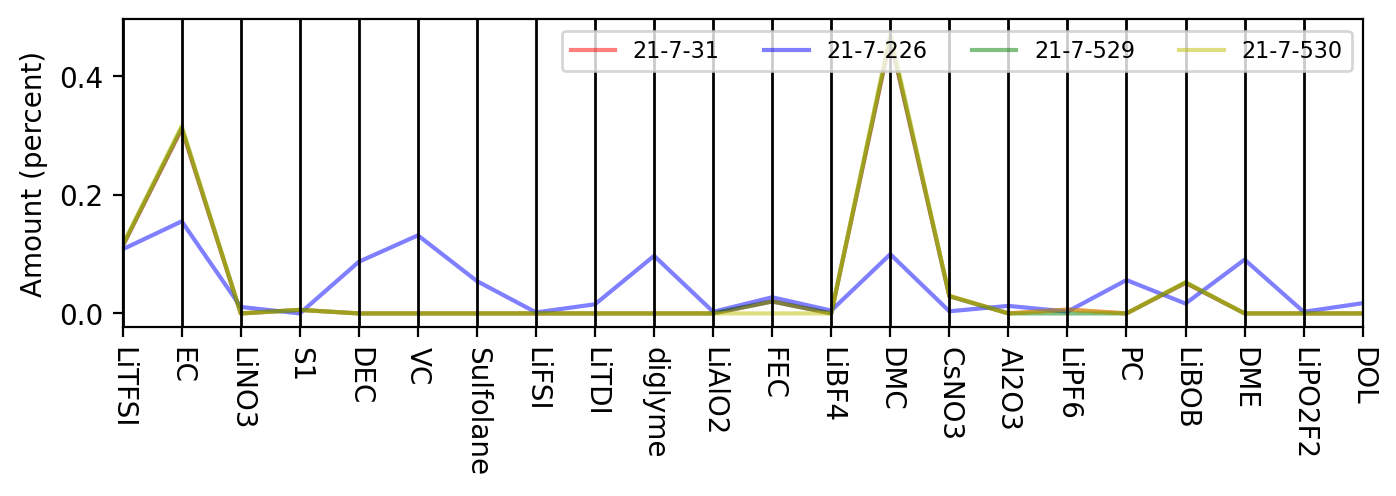

In [13]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
df_plot = df_doe[non_zero_component_names + ["Electrolyte ID"]]
cmap = plt.get_cmap('Set2')
pd.plotting.parallel_coordinates(
    df_plot, 
    "Electrolyte ID",
    color=["r", "b", "g", "y"],
    ax=ax, alpha=0.5
)
ax.grid(0)
# ax.set_ylim([0, 1.2])
ax.legend(loc="upper right", ncols=4, fontsize=8)
ax.set_ylabel("Amount (percent)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
plt.show()

In [146]:
df_cal = df_plot.set_index("Electrolyte ID")

In [163]:
print("Compare with 21-7-226")
df_compare2 = (df_cal.loc[["21-7-31", '21-7-529', '21-7-530']]/df_cal.loc['21-7-226'] * 100).T
df_compare2.insert(0, "21-7-226(raw%)", df_cal.loc["21-7-226"])
df_compare2.dropna()

Compare with 21-7-226


Electrolyte ID       21-7-226(raw%)     21-7-31    21-7-529    21-7-530
LiPF6                      0.003088  208.566482    0.000000  213.382118
LiTFSI                     0.108174  104.882686  105.490881  107.062956
LiFSI                      0.001726    0.000000    0.000000    0.000000
LiPO2F2                    0.002725    0.000000    0.000000    0.000000
LiBOB                      0.016621  309.404300  313.165625  318.359477
LiBF4                      0.004814    0.000000    0.000000    0.000000
LiTDI                      0.015441    0.000000    0.000000    0.000000
EC                         0.155313  200.201306  201.729800  203.777465
DEC                        0.087193    0.000000    0.000000    0.000000
DMC                        0.099909  462.766728  465.888616  472.673722
1,3-dioxolane              0.017257    0.000000    0.000000    0.000000
1,2-dimethoxyethane        0.090827    0.000000    0.000000    0.000000
PC                         0.056312    0.000000    0.000000    0.000000
diglyme                    0.097184    0.000000    0.000000    0.000000
Sulfolane                  0.054496    0.000000    0.000000    0.000000
VC                         0.131698    0.000000    0.000000    0.000000
FEC                        0.027248   74.185493   73.473473    0.000000
LiAlO2                     0.002725    0.000000    0.000000    0.000000
Aluminium Oxide            0.012716    0.000000    0.000000    0.000000
LiNO3                      0.010899    0.000000    0.000000    0.000000
CsNO3                      0.003633  801.312426  799.024024  824.430911
S1                         0.000000         inf         inf         inf

In [ ]:
print("Compare with 21-7-31")
df_compare2 = (df_cal.loc[['21-7-529', '21-7-530']]/df_cal.loc['21-7-31'] * 100).T
df_compare2.insert(0, "21-7-31(raw%)", df_cal.loc["21-7-31"])
df_compare2.dropna()

Compare with 21-7-31


Electrolyte ID  21-7-31(raw%)    21-7-529    21-7-530
LiPF6                0.006441    0.000000  102.308921
LiTFSI               0.113456  100.579881  102.078770
LiBOB                0.051427  101.215667  102.894329
EC                   0.310939  100.763479  101.786282
DMC                  0.462346  100.674614  102.140818
FEC                  0.020214   99.040217    0.000000
CsNO3                0.029112   99.714418  102.885078
S1                   0.005965  100.685403  100.424039

# Number of Components

<AxesSubplot: >

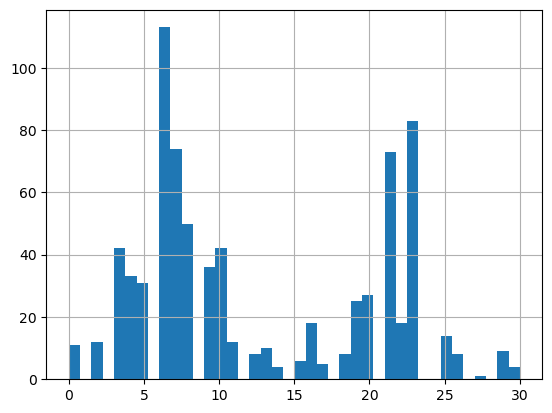

In [19]:
(ds_lm.chemicals > 0).sum(axis=1).hist(bins=40)

In [50]:
(ds_lm.chemicals["DTD"] > 0).sum()

0

In [56]:
solvents = ['BTFEC', 'EC', 'TMSPi', 'DTO', 'EMC', 'DEC', 'Sulfolane', 'diglyme', 'BTFE', 'FEC', 'DMDMOS', 'DMC', 'TFEO', 'TMP', 'BTC', 'TMSNCS', 'TTE', 'DME', 'TFMB', 'DOL', 'PC', 'PS', 'SN', 'VC', 'AN']
salts = ['LiTFSI', 'Li2S', 'LiDFOB', 'LiNO3', 'LiFSI', 'LiTDI', 'LiAlO2', 'LiBF4', 'CsNO3', 'Al2O3', 'LiPF6', 'LiBOB', 'LiTf', 'LiPO2F2', 'Li2O', 'P2O5', 'LiClO4', 'Montmorillonite', 'DTD', 'C1', 'C2', 'C3', 'S1', 'S2', 'S3', 'E1', 'L1']
len(solvents), len(salts)

(25, 27)

In [65]:
ds_lm.chemicals[salts]

LiTFSI  Li2S  LiDFOB  LiNO3     LiFSI     LiTDI  LiAlO2  LiBF4  CsNO3  \
0    0.000000   0.0     0.0   0.00  0.000000  0.000000     0.0    0.0    0.0   
1    0.000000   0.0     0.0   0.01  0.000000  0.000000     0.0    0.0    0.0   
2    0.119784   0.0     0.0   0.00  0.000000  0.000000     0.0    0.0    0.0   
3    0.000000   0.0     0.0   0.00  0.648295  0.000000     0.0    0.0    0.0   
4    0.229264   0.0     0.0   0.00  0.000000  0.000000     0.0    0.0    0.0   
..        ...   ...     ...    ...       ...       ...     ...    ...    ...   
772  0.000000   0.0     0.0   0.00  0.000000  0.000000     0.0    0.0    0.0   
773  0.030491   0.0     0.0   0.00  0.028891  0.029991     0.0    0.0    0.0   
774  0.028006   0.0     0.0   0.00  0.023405  0.038408     0.0    0.0    0.0   
775  0.017302   0.0     0.0   0.00  0.029503  0.027403     0.0    0.0    0.0   
776  0.037296   0.0     0.0   0.00  0.036096  0.025597     0.0    0.0    0.0   

     Al2O3  ...  Montmorillonite  DTD   C1   C2   C3        S1        S2  \
0      0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
1      0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
2      0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
3      0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
4      0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
..     ...  ...              ...  ...  ...  ...  ...       ...       ...   
772    0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
773    0.0  ...              0.0  0.0  0.0  0.0  0.0  0.010897  0.005098   
774    0.0  ...              0.0  0.0  0.0  0.0  0.0  0.000000  0.001800   
775    0.0  ...              0.0  0.0  0.0  0.0  0.0  0.005601  0.000200   
776    0.0  ...              0.0  0.0  0.0  0.0  0.0  0.004100  0.006899   

           S3   E1        L1  
0    0.000000  0.0  0.000000  
1    0.000000  0.0  0.000000  
2    0.000000  0.0  0.000000  
3    0.000000  0.0  0.000000  
4    0.000000  0.0  0.000000  
..        ...  ...       ...  
772  0.000000  0.0  0.000000  
773  0.002599  0.0  0.021394  
774  0.011702  0.0  0.028006  
775  0.000800  0.0  0.043704  
776  0.009899  0.0  0.030097  

[777 rows x 27 columns]

(array([[776.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [285., 145.,  59., 242.,  33.,  10.,   0.,   2.,   1.,   0.],
        [767.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [756.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [672.,  67.,   7.,   4.,   8.,   5.,   8.,   4.,   2.,   0.],
        [599., 108.,  28.,  22.,   1.,  12.,   6.,   1.,   0.,   0.],
        [731.,  26.,   7.,  12.,   0.,   1.,   0.,   0.,   0.,   0.],
        [657.,  99.,  18.,   1.,   1.,   0.,   0.,   0.,   0.,   1.],
        [774.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [660.,  75.,  37.,   2.,   2.,   0.,   0.,   1.,   0.,   0.],
        [776.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.],
        [331., 153.,  51.,  32.,  27., 178.,   4.,   1.,   0.,   0.],
        [774.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [775.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.],
        [776.,   0.,

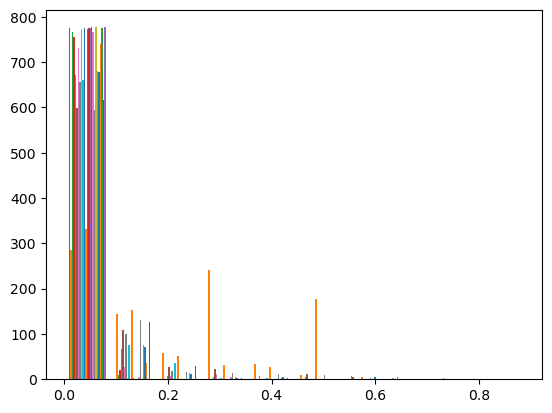

In [67]:
plt.hist(ds_lm.chemicals[solvents].to_numpy(), bins=10)

<AxesSubplot: >

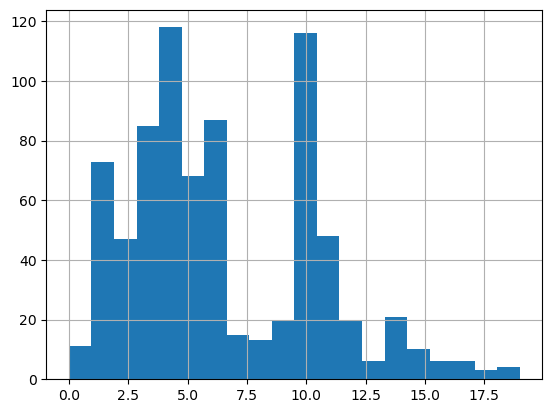

In [64]:
(ds_lm.chemicals.loc[:, salts] > 0).sum(axis=1).hist(bins=20)

# Read dataset

In [2]:
df_all = pd.read_csv("lce_data.csv")
df = df_all.loc[:, ~df_all.columns.isin(["electrolyte_id", "generation_method", "total_mass"])]

In [10]:
doe_ids = ["21-7-31", "21-7-226", "21-7-529", "21-7-530"]
df_all.query("`electrolyte_id` in @doe_ids")

electrolyte_id generation_method  total_mass  1,2-dimethoxyethane  \
94        21-7-31               0.0      10.092                  0.0   

    1,3-dioxolane  Aluminium Oxide   C1   C2   C3     CsNO3  ...  TTE   VC  \
94            0.0              0.0  0.0  0.0  0.0  0.029112  ...  0.0  0.0   

    TMSPi  P2O5  LiDFOB  TFEO  BTFEC  BTFE   AN       LCE  
94    0.0   0.0     0.0   0.0    0.0   0.0  0.0  0.994198  

[1 rows x 49 columns]

# Group the dataset by duplicates within a certain tolerance

In [3]:
tolerance = 0.02 # value difference smaller than this value will be considered to be the same

In [4]:
groups_all = [] # Initialize a list whose elements will be lists of indices for each group in "df_all"

data_points = df.loc[:, ~df.columns.isin(["LCE"])]
data_length = len(data_points)

i_iter = 0
for i in data_points.index:
    i_iter += 1
    if groups_all == []: # The first data point is always a new group
        groups_all.append([i])
        continue
    for group in groups_all: # To see if the current data point falls in any existing group
        diff = abs(data_points.loc[i] - data_points.loc[group].mean(axis=0))
        if (diff <= tolerance).all(): # if diff<tol for all components, add to existing group
            group.append(i) 
            break
    else:
        groups_all.append([i]) # no matching groups found, create a new group
    print(f"Data compared {i_iter}/{data_length}", end="\r", flush=True)

In [7]:
data_points.columns

Index(['1,2-dimethoxyethane', '1,3-dioxolane', 'Aluminium Oxide', 'C1', 'C2',
       'C3', 'CsNO3', 'DEC', 'diglyme', 'DMC', 'DTO', 'E1', 'EC', 'EMC', 'FEC',
       'L1', 'Li2S', 'LiAlO2', 'LiBF4', 'LiBOB', 'LiFSI', 'LiNO3', 'LiPF6',
       'LiPO2F2', 'LiTDI', 'LiTf', 'LiTFSI', 'Lithium Perchlorate',
       'Montmorillonite', 'PC', 'PS', 'S1', 'S2', 'S3', 'SN', 'Sulfolane',
       'TTE', 'VC', 'TMSPi', 'P2O5', 'LiDFOB', 'TFEO', 'BTFEC', 'BTFE', 'AN'],
      dtype='object')

In [6]:
duplicated_indices = [group for group in groups_all if len(group)>1]
duplicated_electrolyte_ids = [df_all.loc[ids, "electrolyte_id"].to_list() for ids in duplicated_indices]
print(f"There are {len(duplicated_indices)} groups that have more than 1 duplicates")

There are 32 groups that have more than 1 duplicates


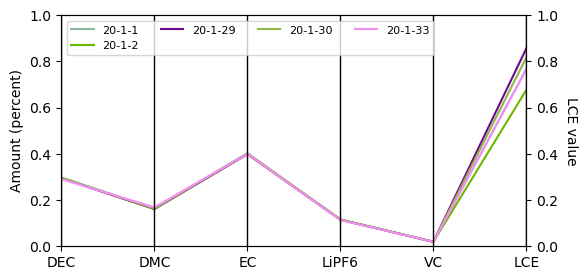

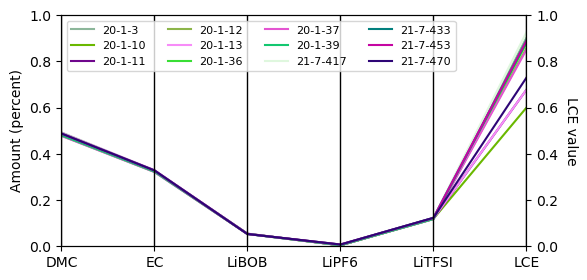

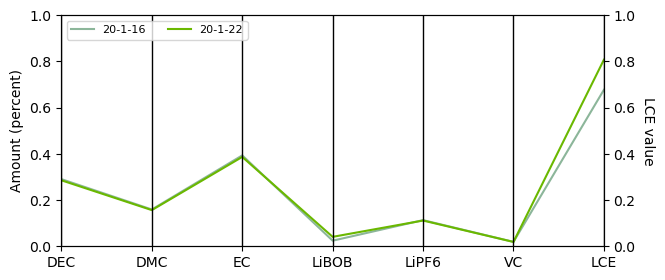

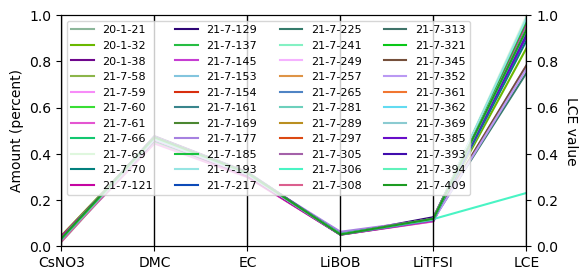

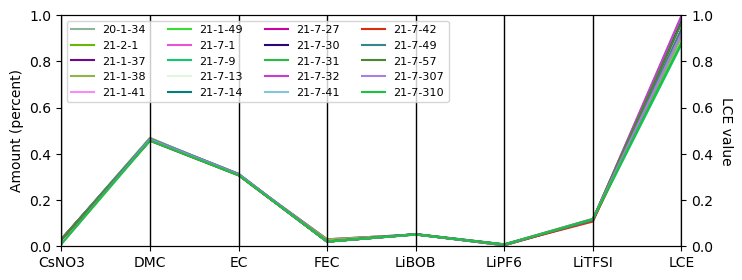

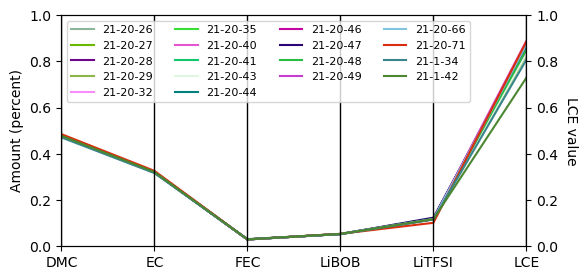

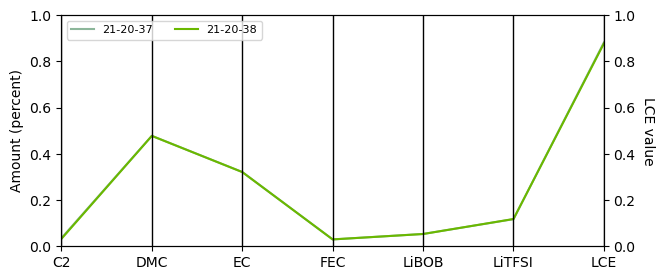

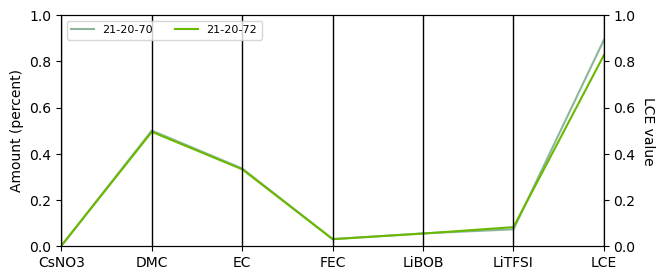

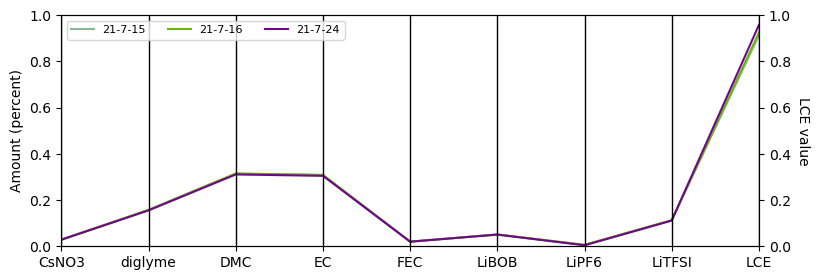

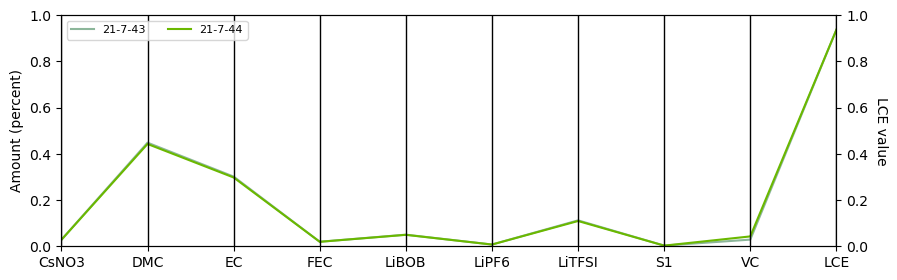

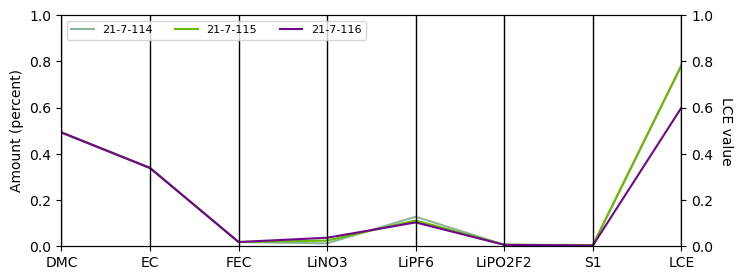

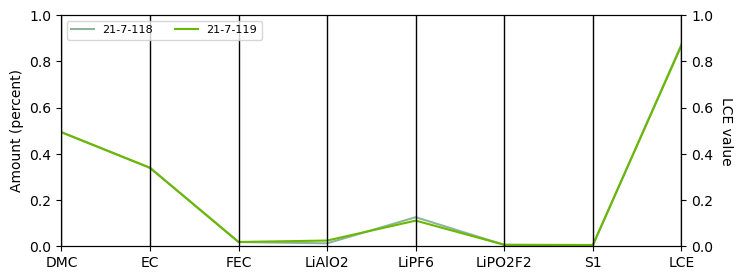

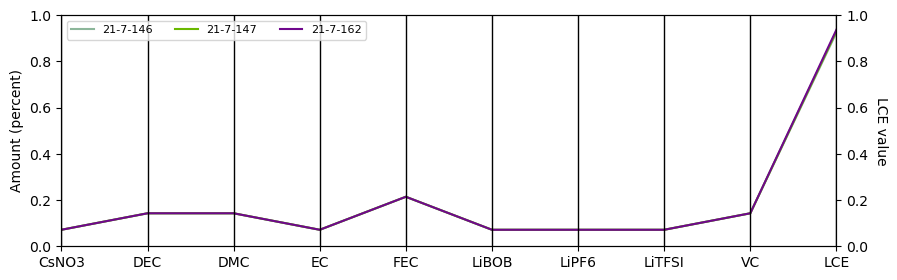

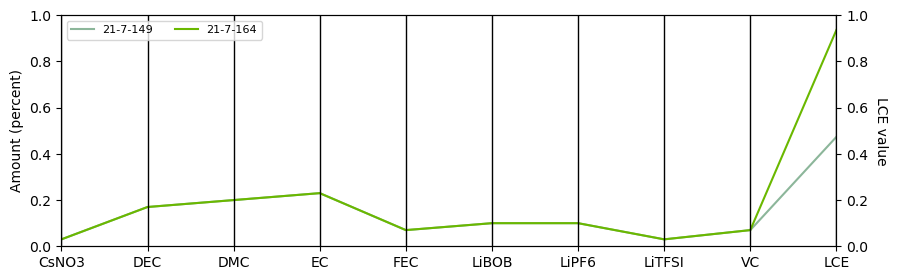

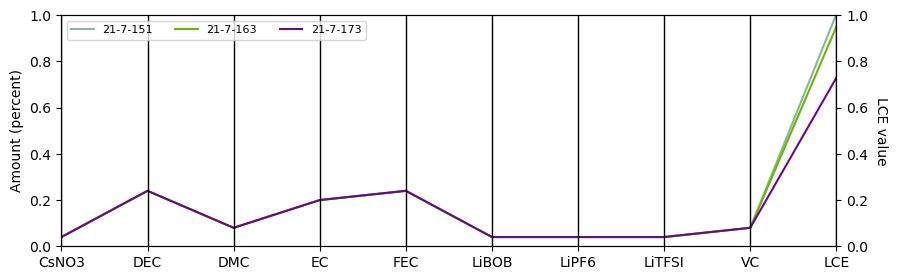

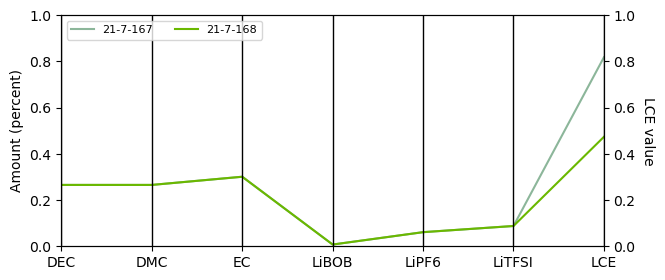

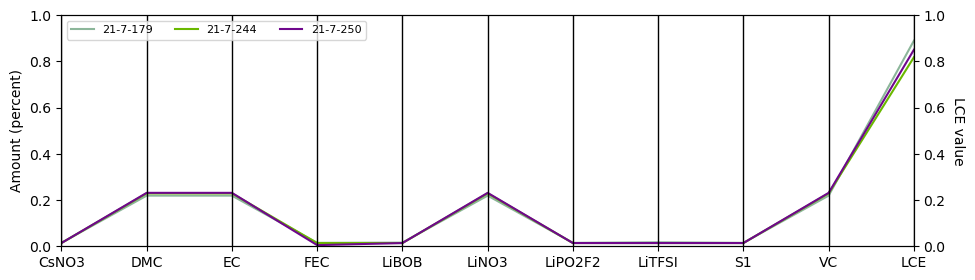

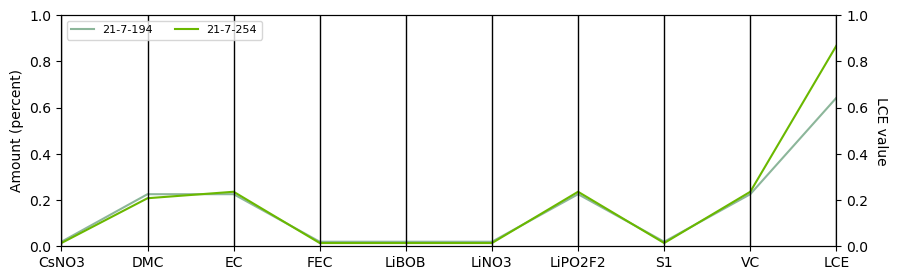

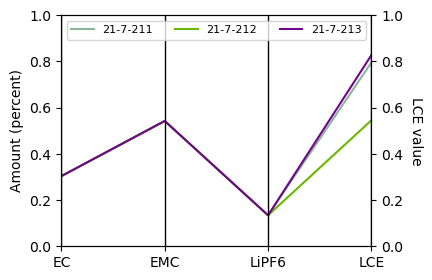

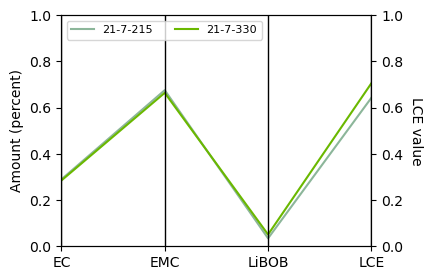

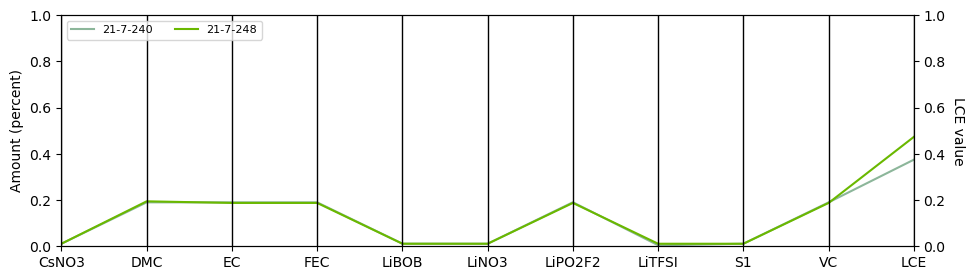

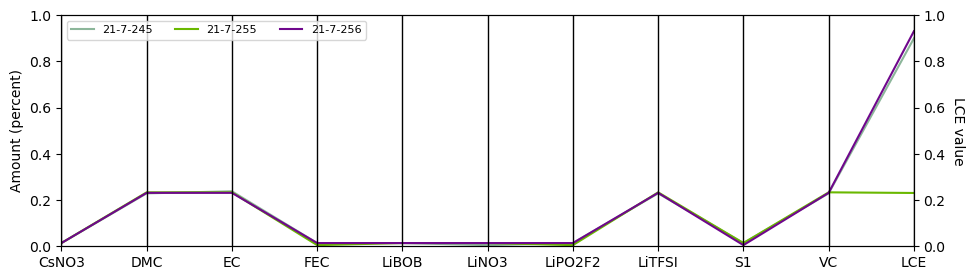

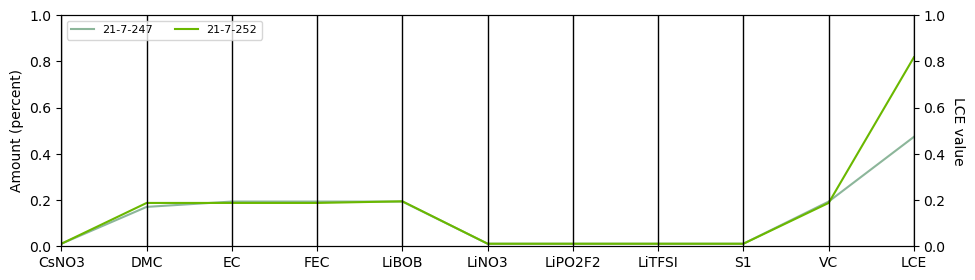

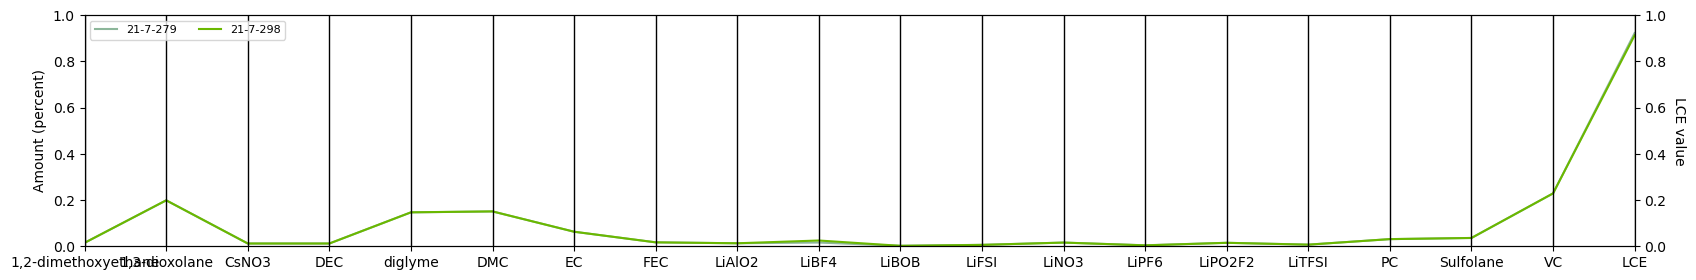

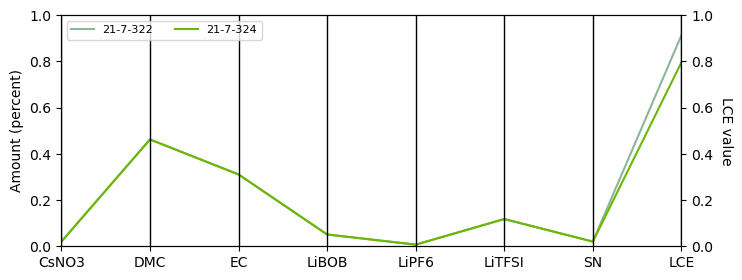

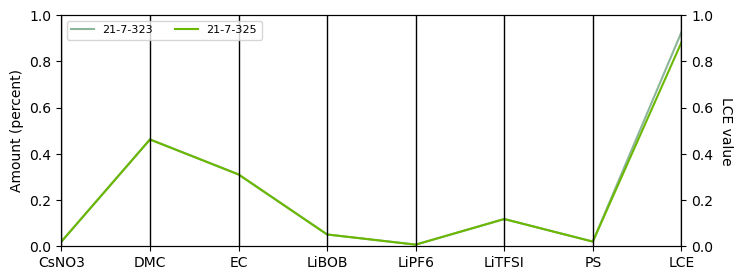

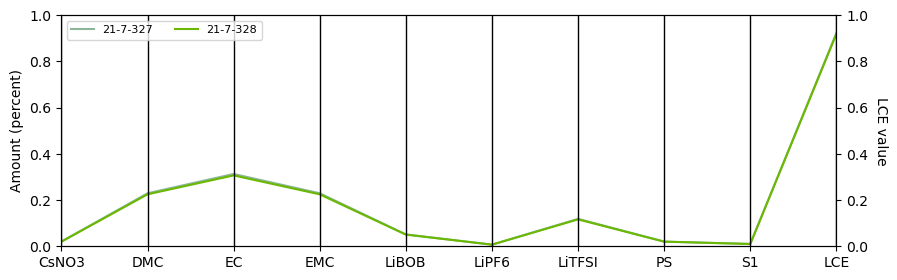

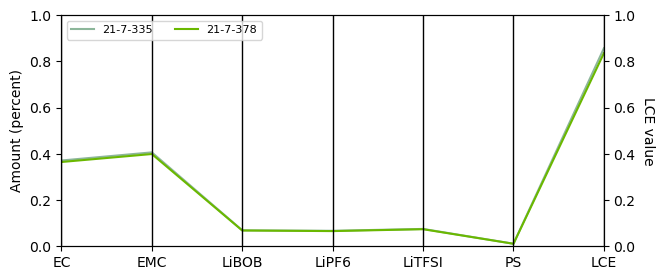

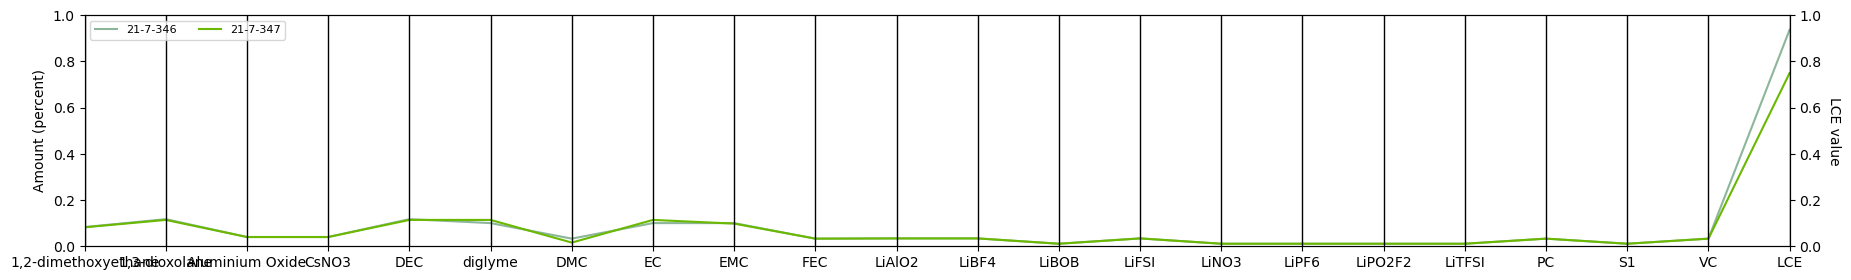

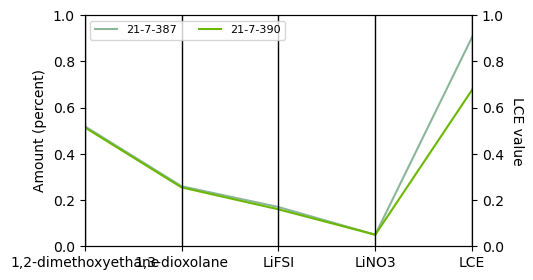

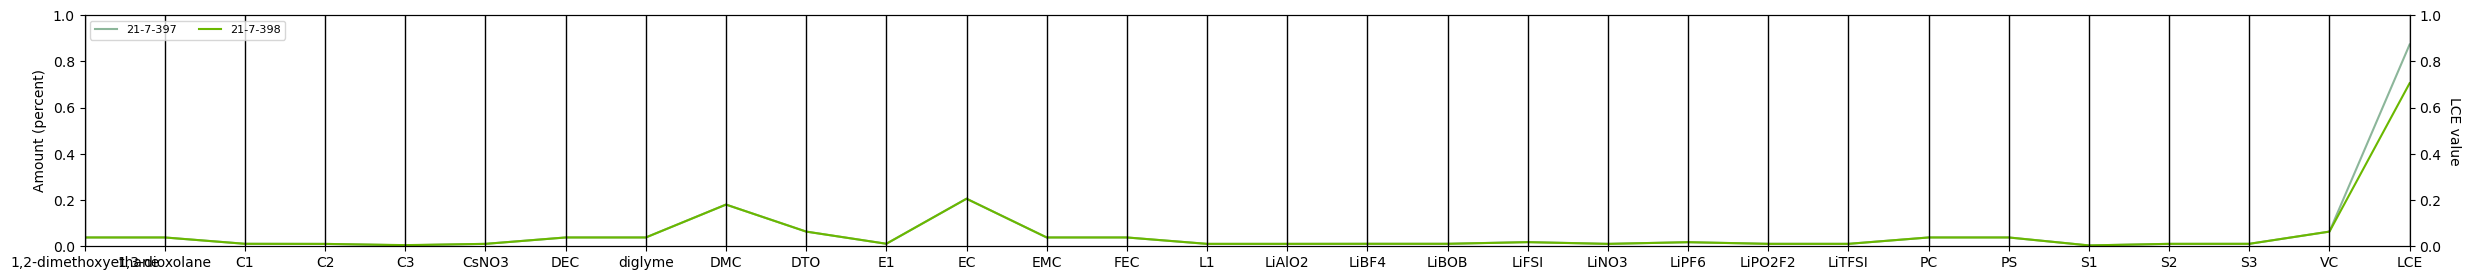

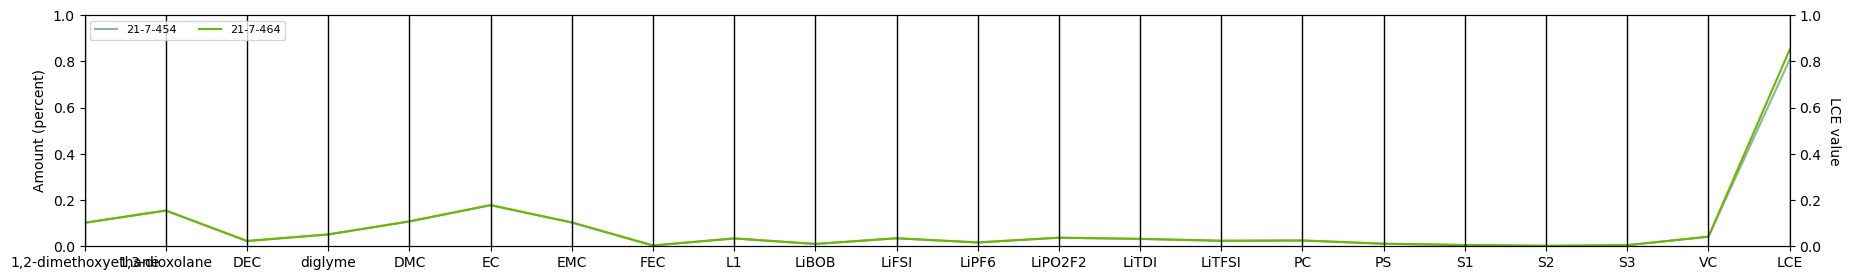

In [7]:
for (indices, electrolyte_ids) in zip(duplicated_indices, duplicated_electrolyte_ids):
    df_duplicate = df.loc[indices]
    df_duplicate = df.loc[indices, (df.loc[indices] > 0).all(axis=0)]
    
    fig, ax = plt.subplots(figsize=(df_duplicate.shape[1], 3))
    df_duplicate["electrolyte_id"] = electrolyte_ids
    pd.plotting.parallel_coordinates(df_duplicate, "electrolyte_id", ax=ax)
    ax.grid(0)
    ax.set_ylim([0, 1])
    ax.legend(loc="upper left", ncols=4, fontsize=8)
    ax1 = ax.twinx()
    ax.set_ylabel("Amount (percent)")
    ax1.set_ylabel("LCE value", rotation=270, va="bottom")
    plt.show()

# Keep only the highest measurment for each duplicated data point

In [8]:
indices_to_remove = [] # a list of indicies of duplicates to be removed from the dataframe
for (indices, electrolyte_ids) in zip(duplicated_indices, duplicated_electrolyte_ids):
    df_duplicate = df.loc[indices, (df.loc[indices] > 0).all(axis=0)]
    index_max_LCE = df_duplicate.loc[:, ["LCE"]].idxmax()[0]
    indices_copy = copy(indices)
    indices_copy.remove(index_max_LCE) # exclude the index of maximum LCE
    indices_to_remove.extend(indices_copy)
print(f"There are {len(indices_to_remove)} datapoints to be remove from the dataframe.")

There are 128 datapoints to be remove from the dataframe.


In [26]:
df_no_duplicate = df.drop(index=indices_to_remove)
df_all_no_duplicate = df_all.drop(index=indices_to_remove)
df_all_no_duplicate.insert(0, "group", [None]*len(df_all_no_duplicate)) # add a group column to install information
df_no_duplicate

1,2-dimethoxyethane  1,3-dioxolane  Aluminium Oxide   C1   C2   C3  \
3               0.569789       0.000000              0.0  0.0  0.0  0.0   
4               0.107143       0.000000              0.0  0.0  0.0  0.0   
9               0.000000       0.000000              0.0  0.0  0.0  0.0   
10              0.000000       0.000000              0.0  0.0  0.0  0.0   
13              0.000000       0.000000              0.0  0.0  0.0  0.0   
..                   ...            ...              ...  ...  ...  ...   
466             0.115824       0.127516              0.0  0.0  0.0  0.0   
467             0.033100       0.160600              0.0  0.0  0.0  0.0   
468             0.128500       0.117800              0.0  0.0  0.0  0.0   
469             0.000900       0.000000              0.0  0.0  0.0  0.0   
470             0.004500       0.000000              0.0  0.0  0.0  0.0   

     CsNO3       DEC  diglyme       DMC  ...  TTE        VC  TMSPi  P2O5  \
3      0.0  0.000000      0.0  0.000000  ...  0.0  0.000000    0.0   0.0   
4      0.0  0.265873      0.0  0.145833  ...  0.0  0.017507    0.0   0.0   
9      0.0  0.000000      0.0  0.519444  ...  0.0  0.000000    0.0   0.0   
10     0.0  0.291450      0.0  0.159808  ...  0.0  0.019193    0.0   0.0   
13     0.0  0.285600      0.0  0.156600  ...  0.0  0.018800    0.0   0.0   
..     ...       ...      ...       ...  ...  ...       ...    ...   ...   
466    0.0  0.097735      0.0  0.042072  ...  0.0  0.026682    0.0   0.0   
467    0.0  0.102800      0.0  0.118300  ...  0.0  0.057900    0.0   0.0   
468    0.0  0.151200      0.0  0.095000  ...  0.0  0.042700    0.0   0.0   
469    0.0  0.088600      0.0  0.060100  ...  0.0  0.072700    0.0   0.0   
470    0.0  0.086000      0.0  0.037400  ...  0.0  0.041500    0.0   0.0   

     LiDFOB    TFEO   BTFEC    BTFE      AN       LCE  
3    0.0000  0.0000  0.0000  0.0000  0.0000  0.473684  
4    0.0000  0.0000  0.0000  0.0000  0.0000  0.729730  
9    0.0000  0.0000  0.0000  0.0000  0.0000  0.642857  
10   0.0000  0.0000  0.0000  0.0000  0.0000  0.767442  
13   0.0000  0.0000  0.0000  0.0000  0.0000  0.807692  
..      ...     ...     ...     ...     ...       ...  
466  0.0000  0.0000  0.0000  0.0000  0.0000  0.677419  
467  0.0000  0.0000  0.0000  0.0000  0.0000  0.868421  
468  0.0000  0.0000  0.0000  0.0000  0.0000  0.818182  
469  0.0635  0.0523  0.0144  0.1089  0.0470  0.924812  
470  0.1109  0.0562  0.0422  0.0174  0.0109  0.905660  

[343 rows x 46 columns]

# Distribution: # of active components

In [10]:
data_points = df_no_duplicate.loc[:, ~df_no_duplicate.columns.isin(["LCE"])]
is_present = (data_points > 0).astype(int)

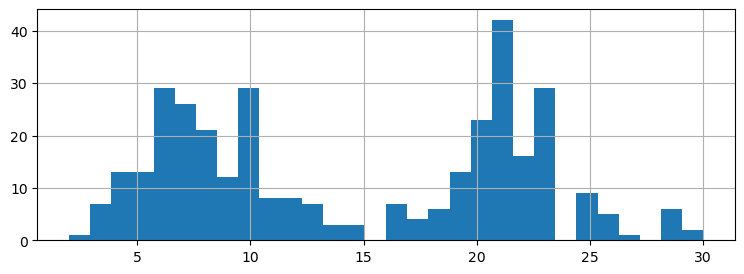

In [11]:
fig, ax = plt.subplots(figsize=(9,3))
is_present.sum(axis=1).hist(bins=30, ax=ax)
plt.show()

In [12]:
df_num_components = df_no_duplicate.copy()
df_num_components["num_components"] = is_present.sum(axis=1)

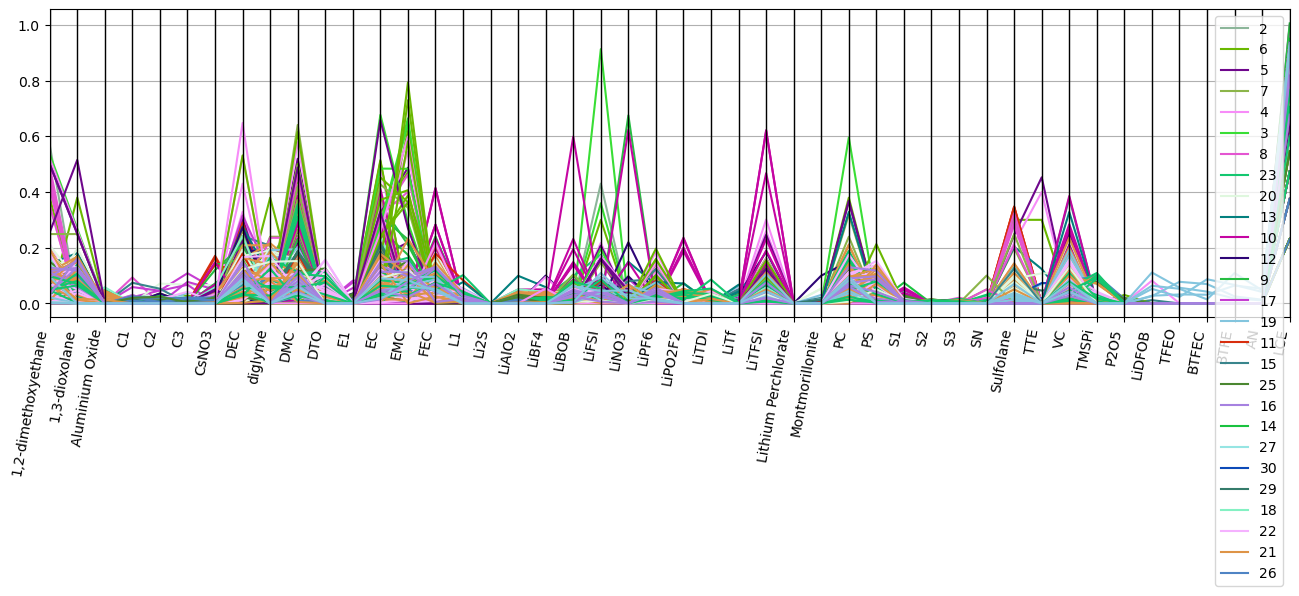

In [13]:
fig, ax = plt.subplots(figsize=(16,4))
pd.plotting.parallel_coordinates(df_num_components, "num_components", ax=ax)
ax.set_xticklabels(df_num_components.columns[:-1], rotation=80, ha="right", va="top")
plt.show()

# Group the dataset by common materials

In [14]:
groups_common_components = [] # Initialize a list whose elements will be lists of indices for each group in "df_all"

data_points = df_no_duplicate.loc[:, ~df_no_duplicate.columns.isin(["LCE"])]
is_present = (data_points > 0).astype(int)
data_length = len(data_points)

i_iter = 0
for i in is_present.index:
    i_iter += 1
    if groups_common_components == []: # The first data point is always a new group
        groups_common_components.append([i])
        continue
    for group in groups_common_components: # To see if the current data point has the same non-zero component as any existing group
        same_in_presence = abs(is_present.loc[i] - is_present.loc[group]).sum(axis=1) == 0
        if same_in_presence.all(): # if diff_in_presence for no component, add to existing group
            group.append(i) 
            break
    else:
        groups_common_components.append([i]) # no matching groups found, create a new group
    print(f"Data compared {i_iter}/{data_length}", end="\r", flush=True)

In [15]:
grouped_indices = [group for group in groups_common_components if len(group)>1]
grouped_electrolyte_ids = [df_all.loc[ids, "electrolyte_id"].to_list() for ids in grouped_indices]
print(f"There are {len(grouped_electrolyte_ids)} groups of (multi-) measurements")

There are 42 groups of (multi-) measurements


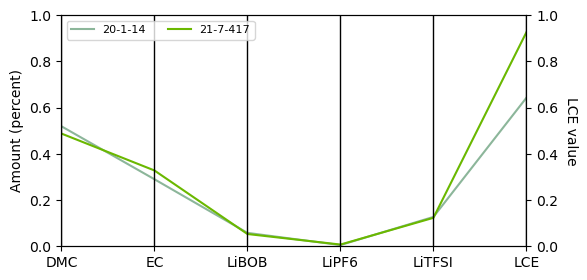

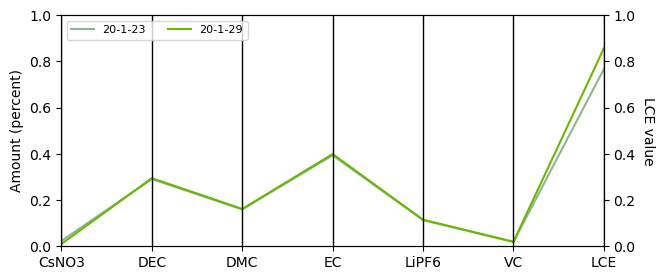

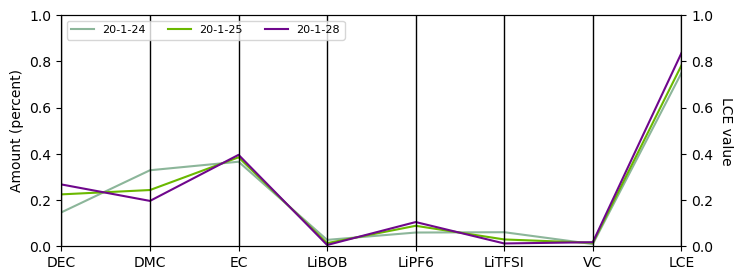

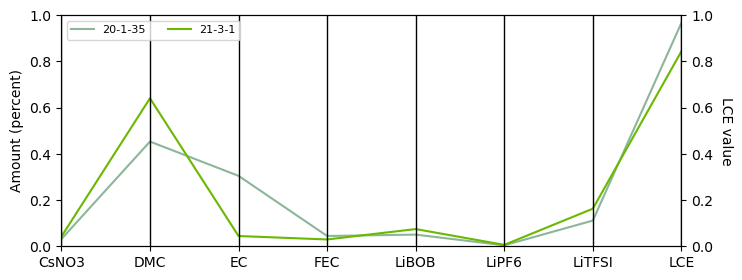

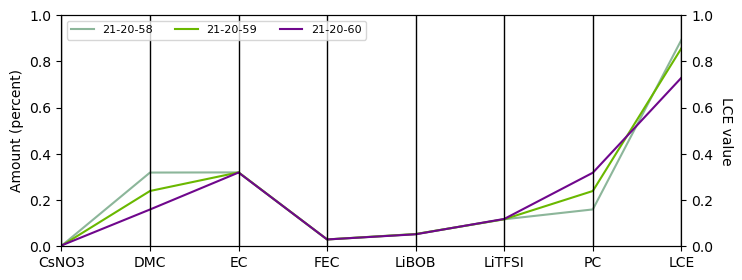

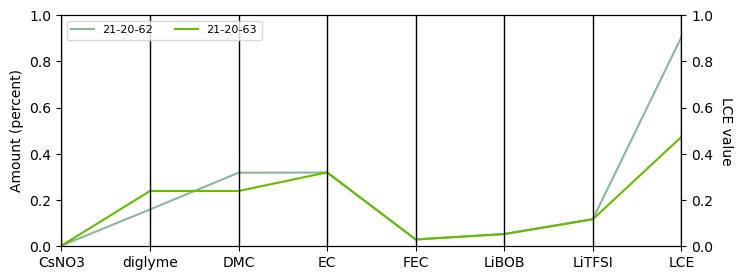

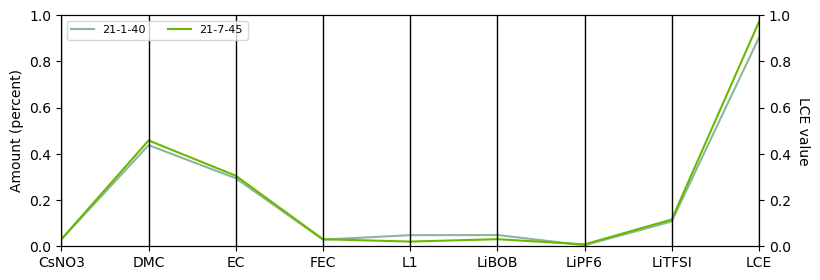

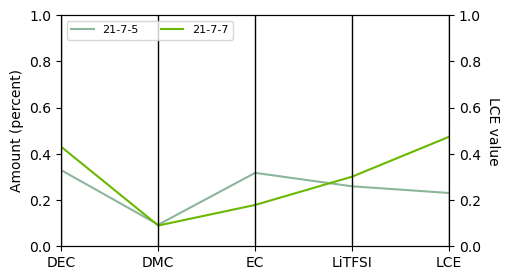

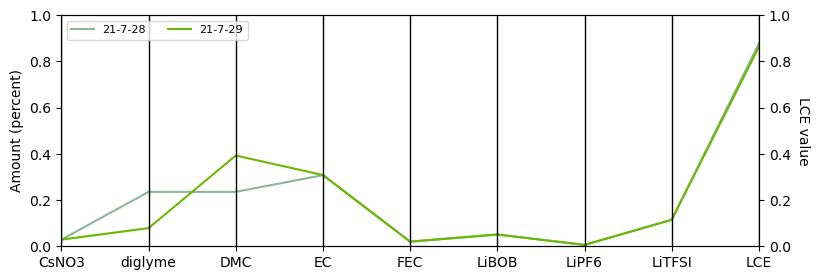

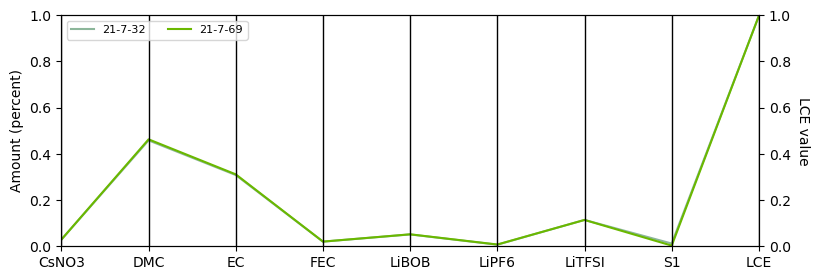

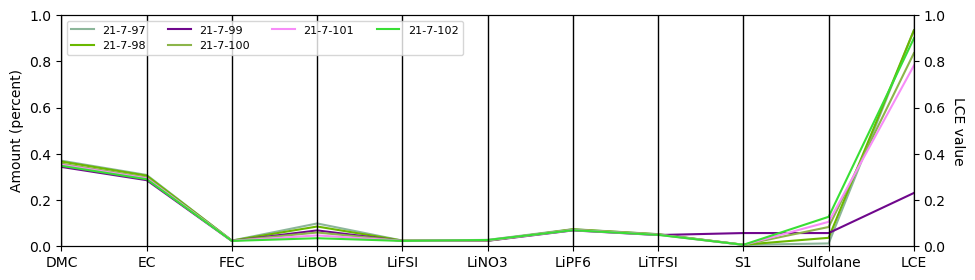

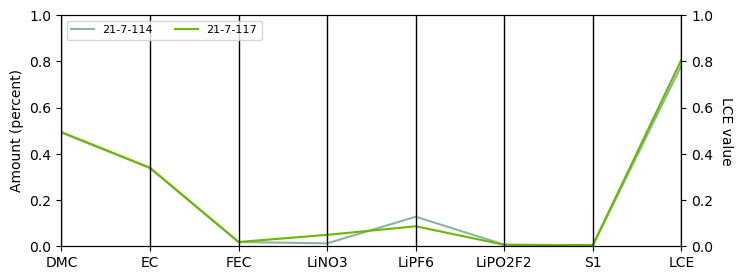

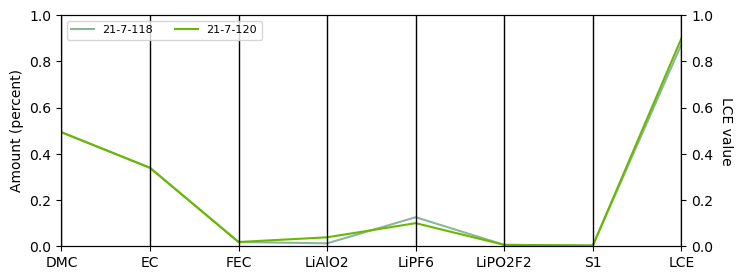

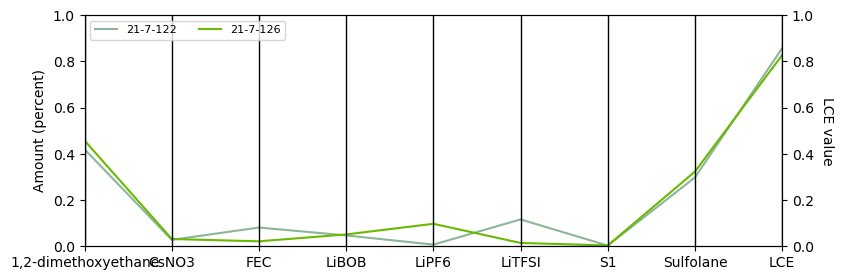

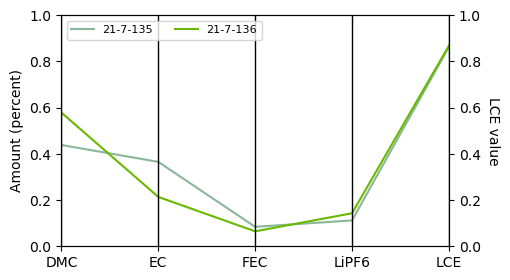

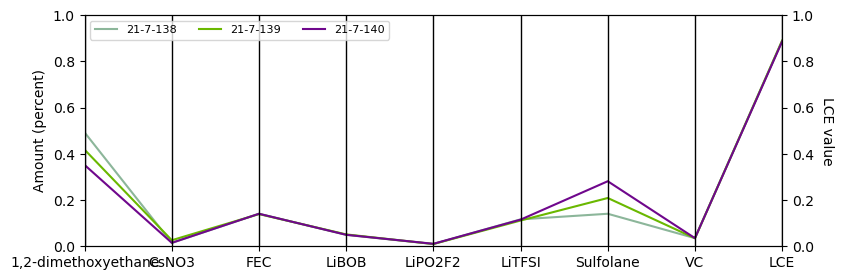

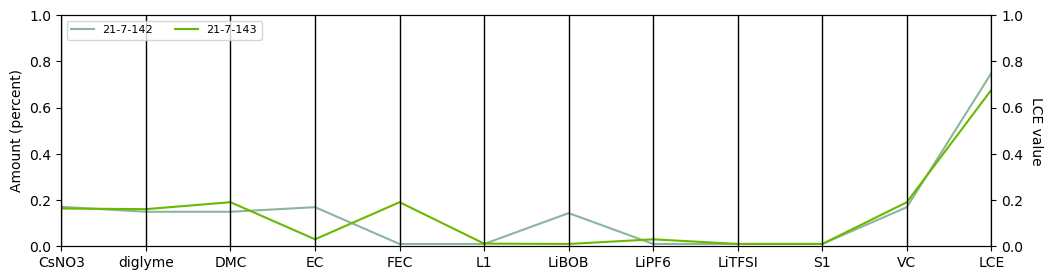

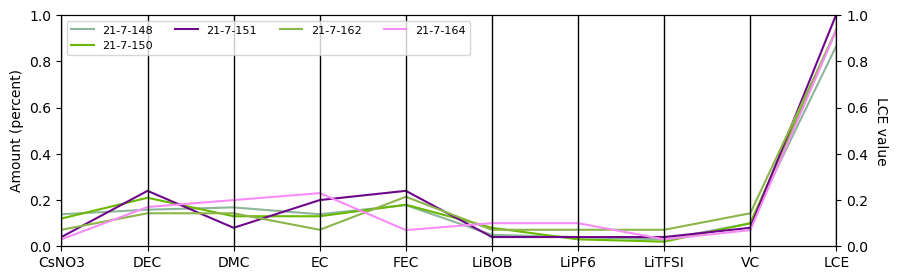

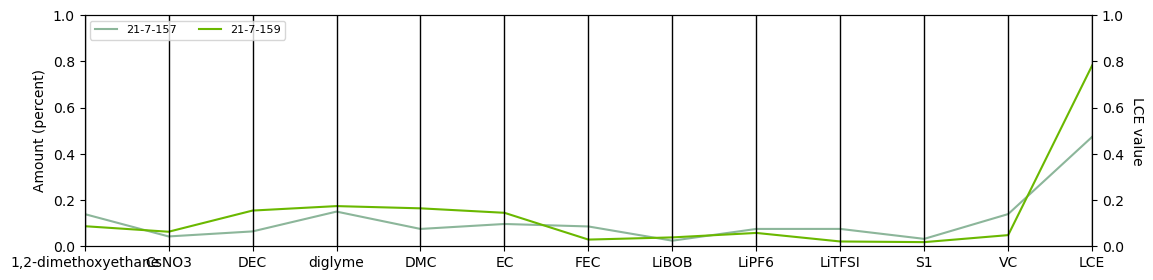

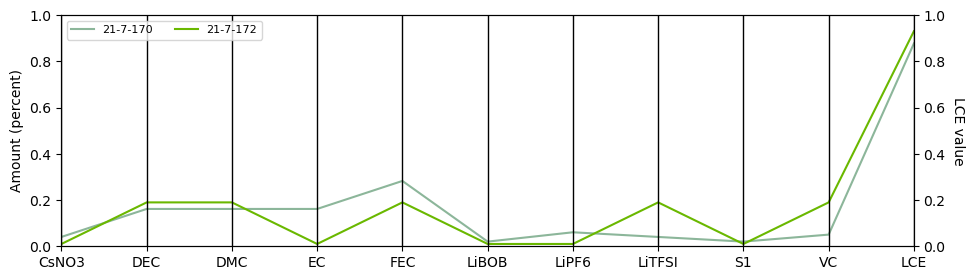

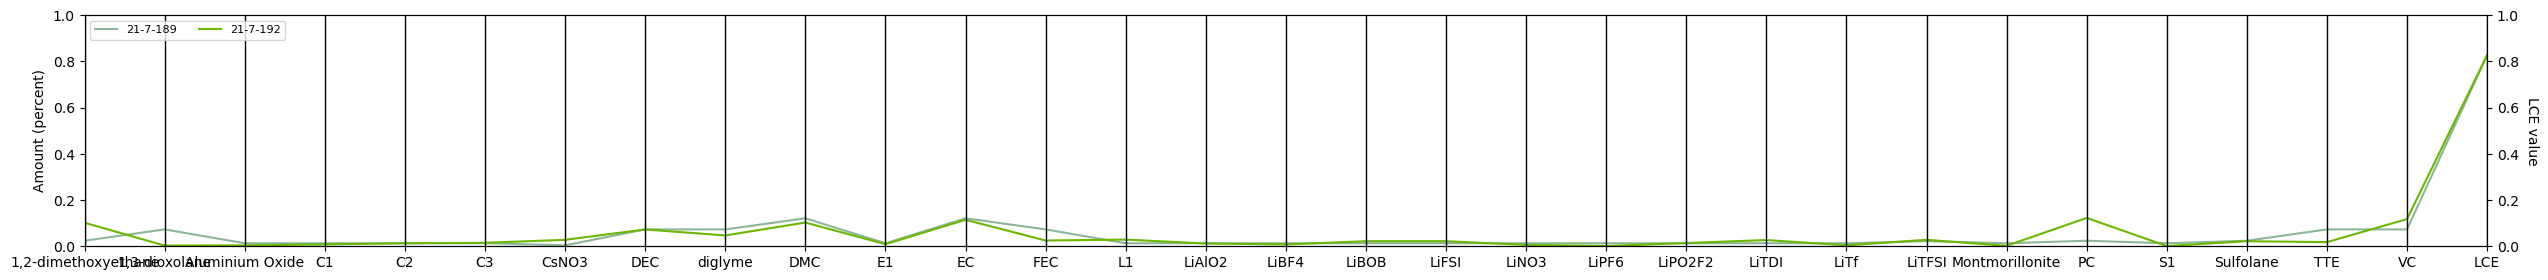

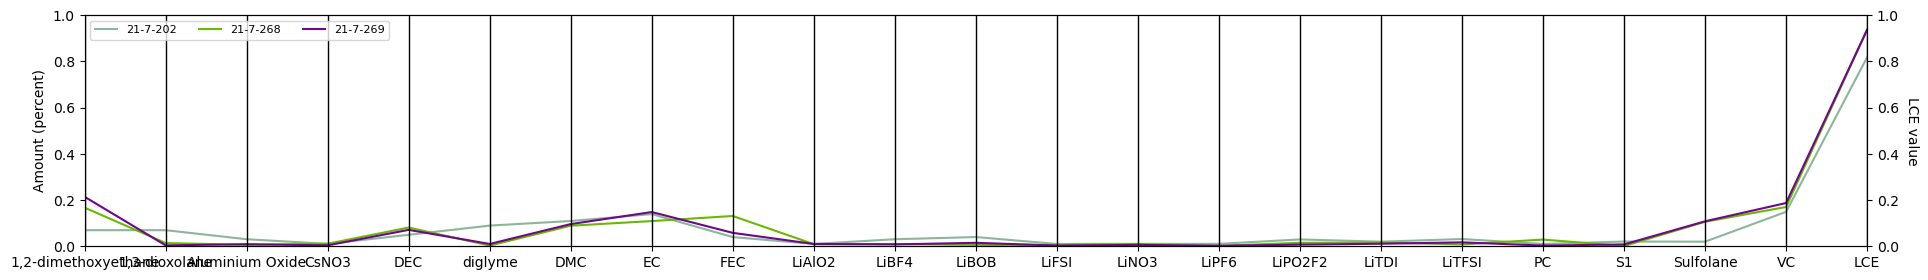

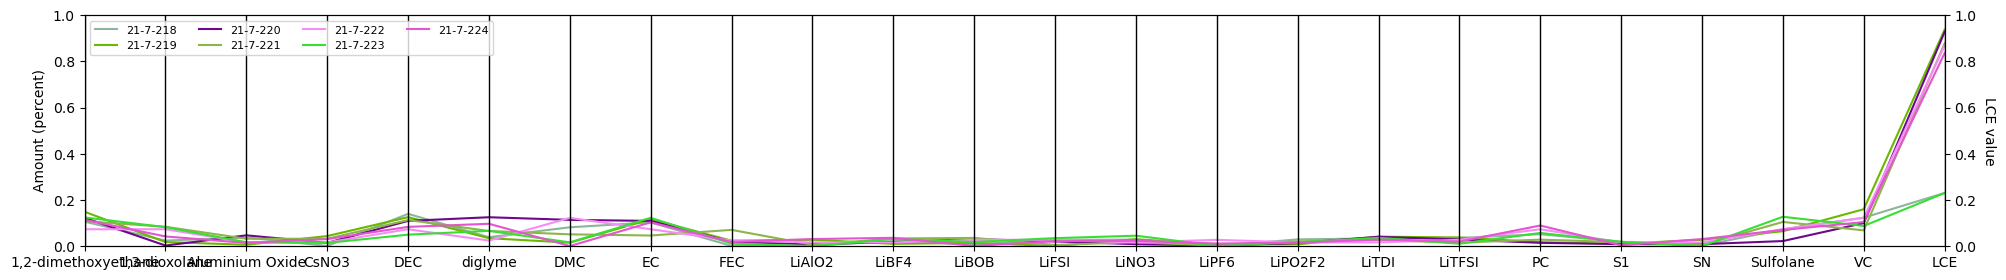

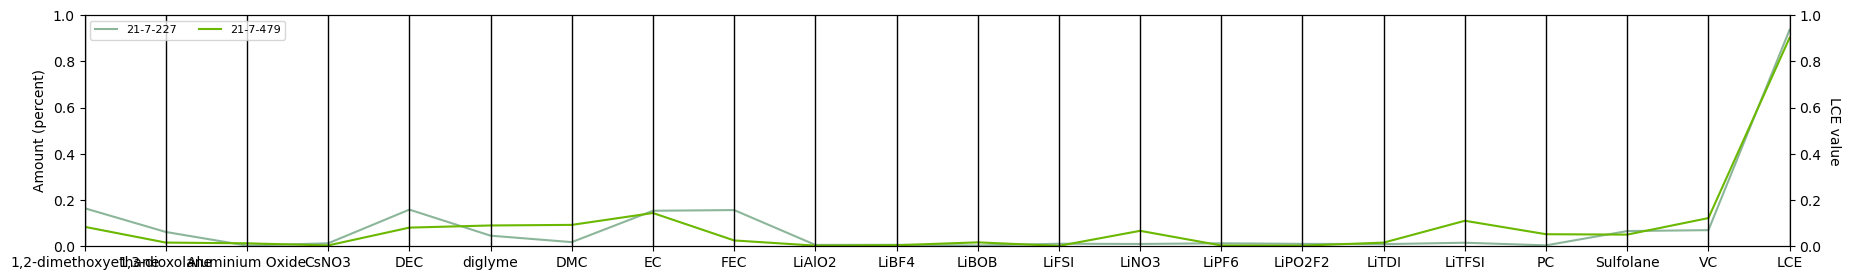

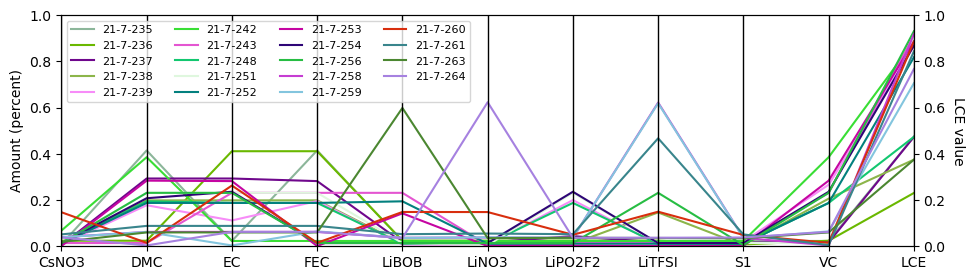

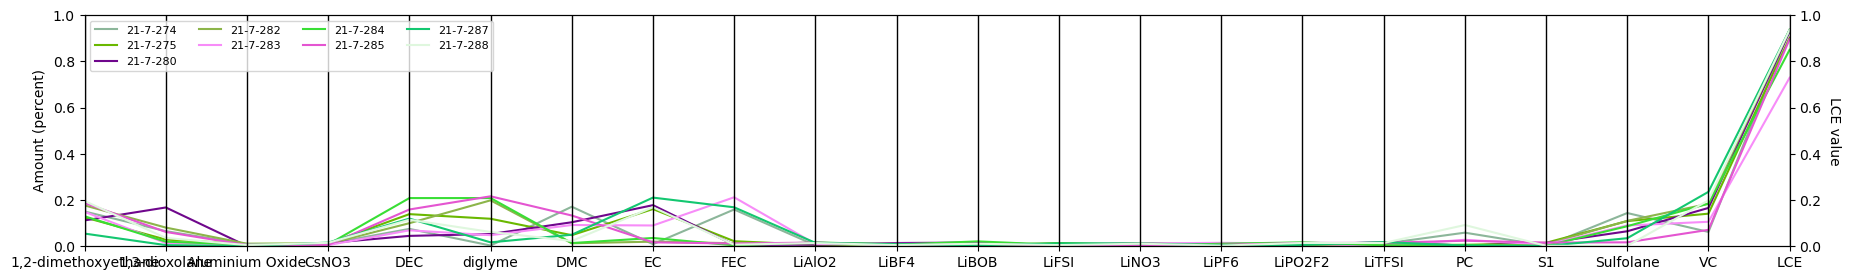

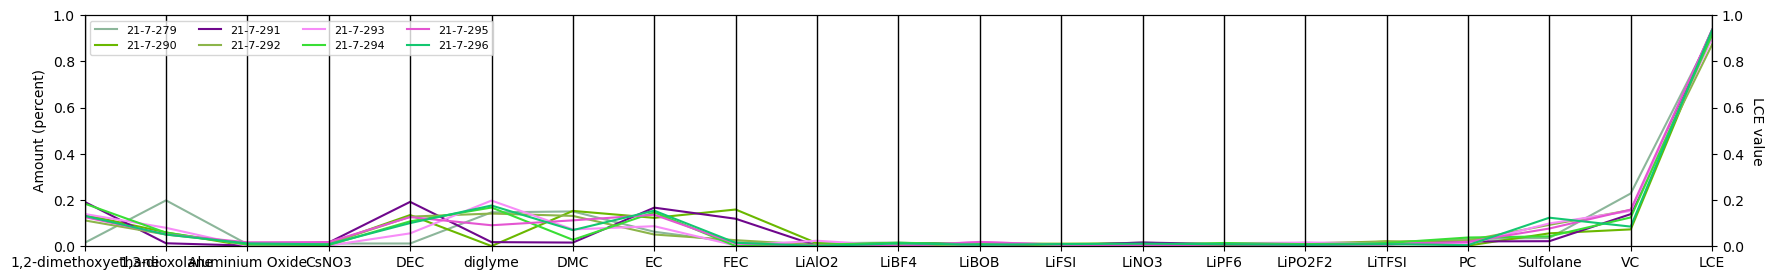

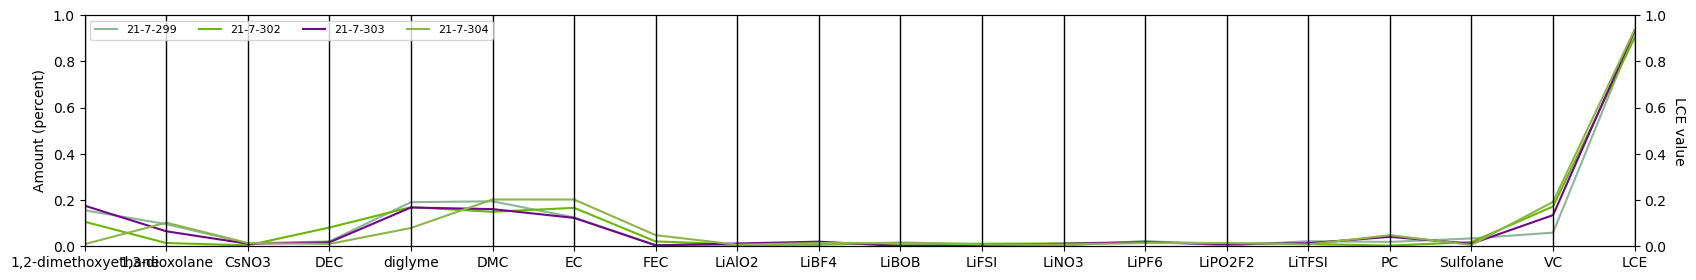

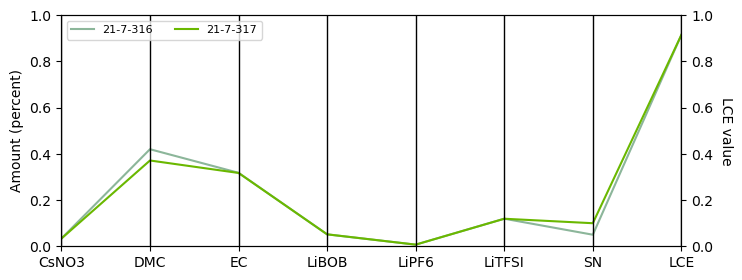

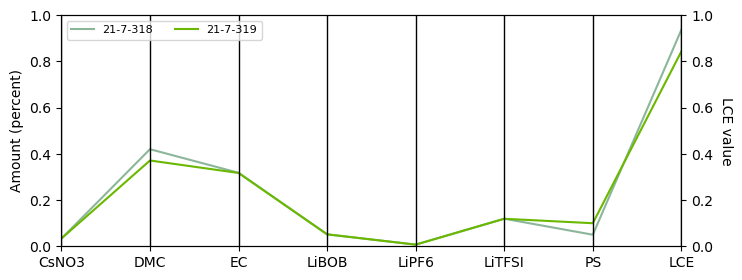

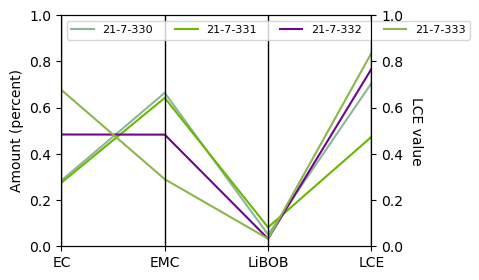

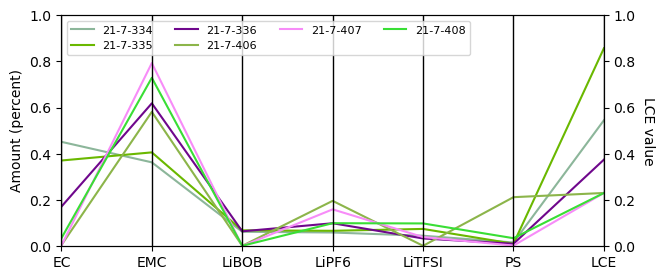

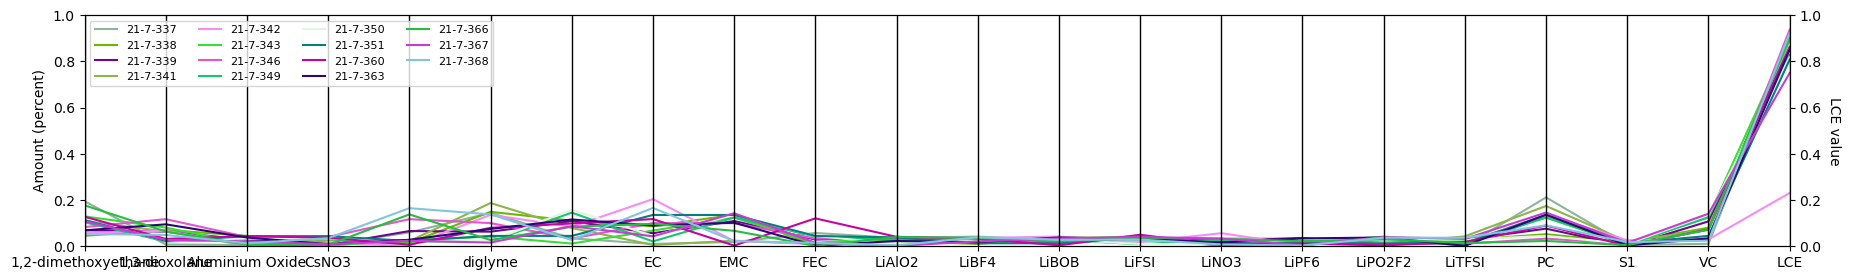

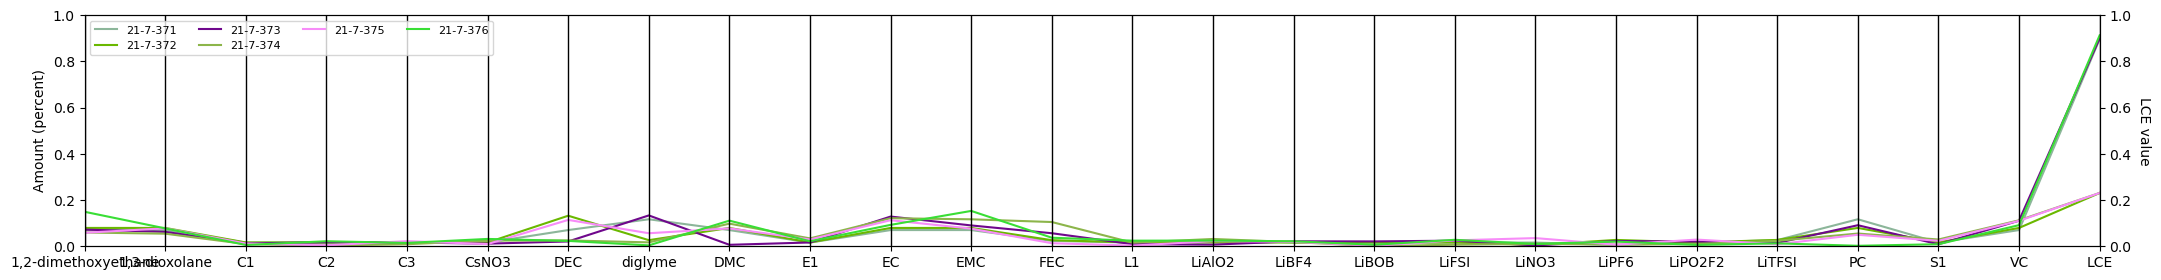

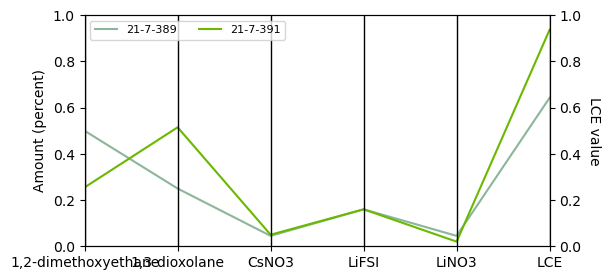

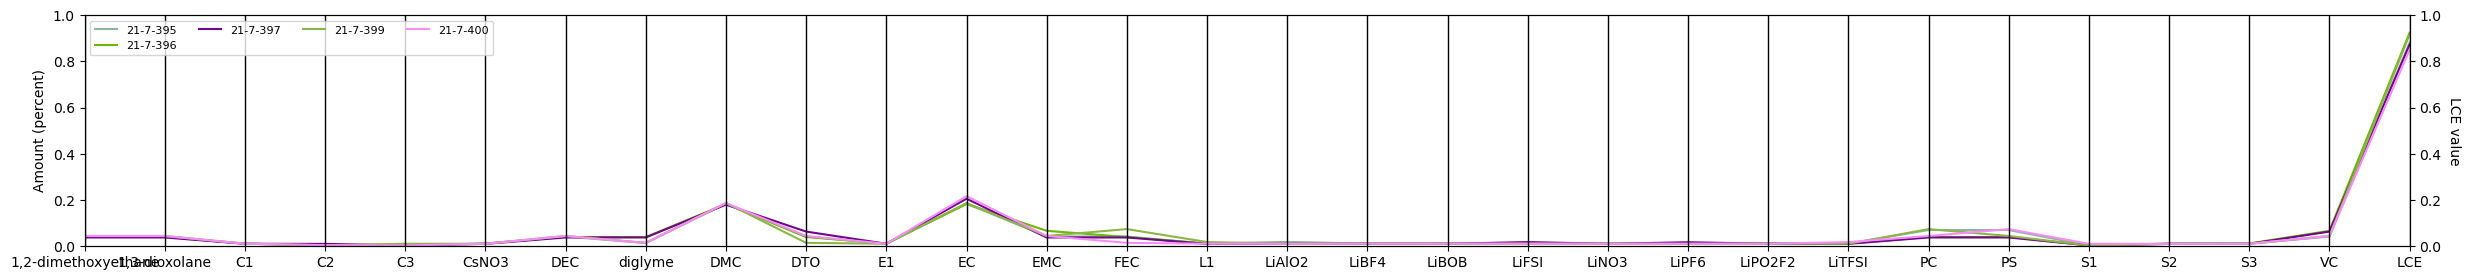

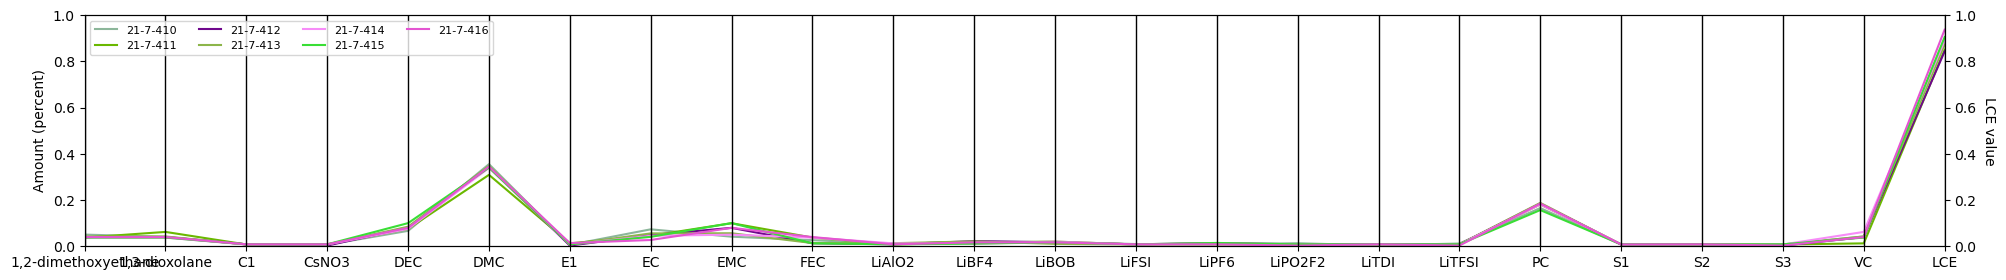

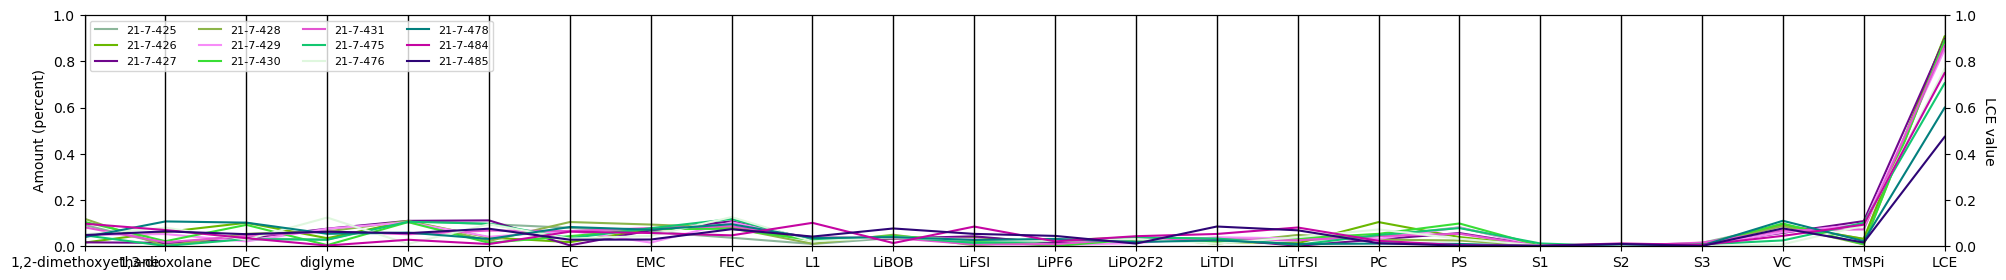

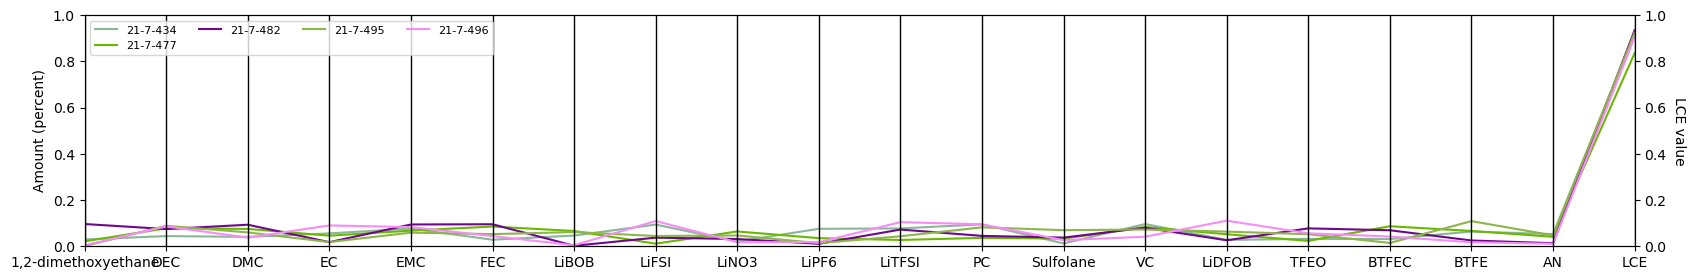

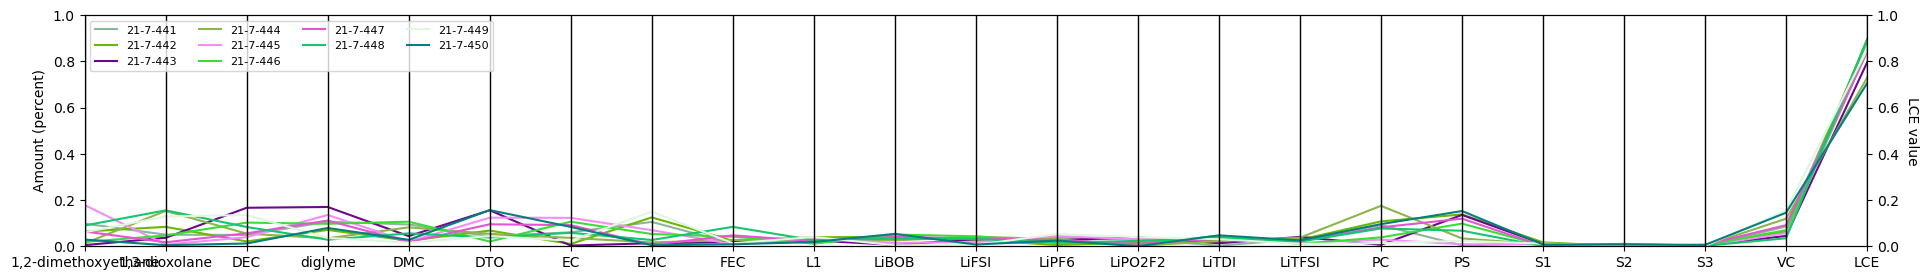

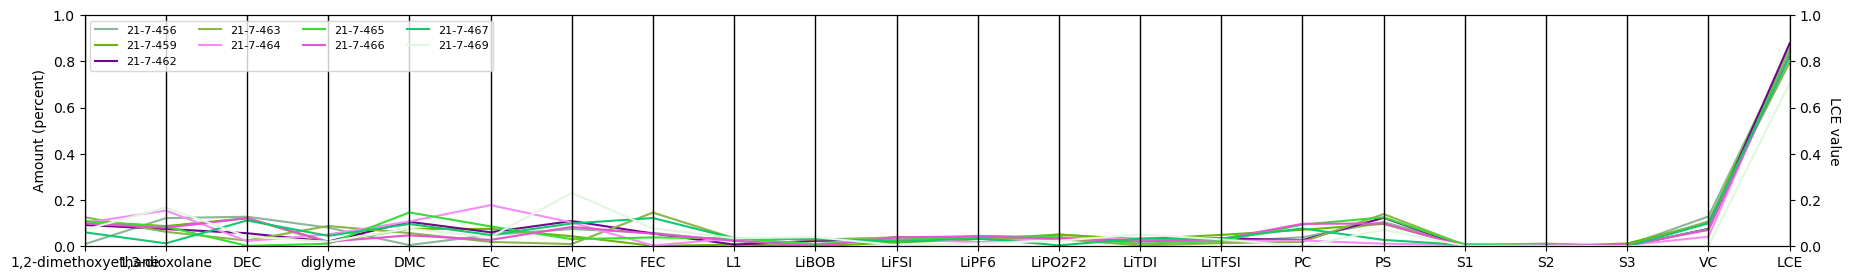

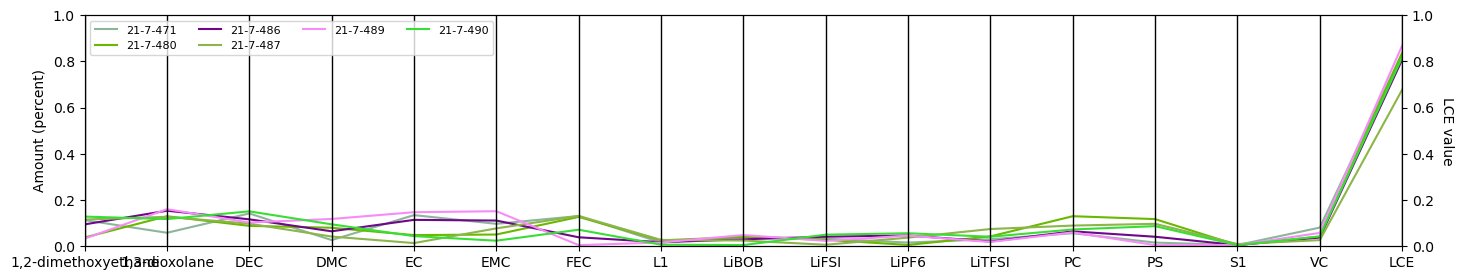

In [16]:
for (indices, electrolyte_ids) in zip(grouped_indices, grouped_electrolyte_ids):
    df_all_no_duplicate.loc[indices, "group"] = 
    df_group = df.loc[indices, (df.loc[indices] > 0).all(axis=0)]
    # if df_group.shape[1] < 12: continue # display only more than 10 components
    fig, ax = plt.subplots(figsize=(df_group.shape[1], 3))
    df_group["electrolyte_id"] = electrolyte_ids
    pd.plotting.parallel_coordinates(df_group, "electrolyte_id", ax=ax)
    ax.grid(0)
    ax.set_ylim([0, 1])
    ax.legend(loc="upper left", ncols=4, fontsize=8)
    ax1 = ax.twinx()
    ax.set_ylabel("Amount (percent)")
    ax1.set_ylabel("LCE value", rotation=270, va="bottom")
    plt.show()

# generated filterd/grouped data

In [46]:
assert len(df_all_no_duplicate) == sum([len(group) for group in groups_common_components])
for i, group in enumerate(groups_common_components):
    df_all_no_duplicate.loc[group, "group"] = i+1

In [47]:
df_all_no_duplicate.to_csv("ice_data_no_duplicate_grouped.csv", index=False)

# Impact of a single component [WIP]

In [50]:
# The percentage of measurements where certain component is absent.
zero_percentage = (df == 0).sum(axis=0) / len(df) * 100
zero_percentage

1,2-dimethoxyethane     56.475584
1,3-dioxolane           62.845011
Aluminium Oxide         83.651805
C1                      89.384289
C2                      90.870488
C3                      92.144374
CsNO3                   34.394904
DEC                     52.229299
diglyme                 65.180467
DMC                     14.649682
DTO                     90.233546
E1                      91.507431
EC                       5.732484
EMC                     72.611465
FEC                     25.477707
L1                      80.891720
Li2S                    99.787686
LiAlO2                  74.522293
LiBF4                   76.220807
LiBOB                   14.649682
LiFSI                   58.811040
LiNO3                   68.577495
LiPF6                   24.203822
LiPO2F2                 58.598726
LiTDI                   81.528662
LiTf                    95.541401
LiTFSI                  12.951168
Lithium Perchlorate    100.000000
Montmorillonite         97.239915
PC            

In [51]:
# Average LCE when certain component is (not) absent
lce_zero_average = {
    col: df.query(f"`{col}` == 0").loc[:, "LCE"].mean()
    for col in df.columns
}
lce_non_zero_average = {
    col: df.query(f"`{col}` > 0").loc[:, "LCE"].mean()
    for col in df.columns
}

lce_summary = pd.DataFrame(
    data={
        "zero_percentage": zero_percentage,
        "lce_if_zero": lce_zero_average,
        "lce_if_non_zero": lce_non_zero_average,
    }
)

lce_summary

zero_percentage  lce_if_zero  lce_if_non_zero
1,2-dimethoxyethane        56.475584     0.815471         0.803811
1,3-dioxolane              62.845011     0.813715         0.804783
Aluminium Oxide            83.651805     0.809164         0.816699
C1                         89.384289     0.818583         0.741468
C2                         90.870488     0.817657         0.738126
C3                         92.144374     0.819162         0.707576
CsNO3                      34.394904     0.786015         0.823179
DEC                        52.229299     0.815809         0.804478
diglyme                    65.180467     0.818792         0.794681
DMC                        14.649682     0.734200         0.823475
DTO                        90.233546     0.812578         0.790239
E1                         91.507431     0.814631         0.764773
EC                          5.732484     0.766872         0.813043
EMC                        72.611465     0.820277         0.784200
FEC                        25.477707     0.800669         0.813722
L1                         80.891720     0.818846         0.774627
Li2S                       99.787686     0.810679         0.677419
LiAlO2                     74.522293     0.812370         0.804622
LiBF4                      76.220807     0.804803         0.828325
LiBOB                      14.649682     0.784449         0.814850
LiFSI                      58.811040     0.813808         0.805525
LiNO3                      68.577495     0.819776         0.789926
LiPF6                      24.203822     0.765451         0.824749
LiPO2F2                    58.598726     0.817499         0.800343
LiTDI                      81.528662     0.813708         0.795781
LiTf                       95.541401     0.814462         0.723269
LiTFSI                     12.951168     0.770692         0.816304
Lithium Perchlorate       100.000000     0.810396              NaN
Montmorillonite            97.239915     0.812738         0.727883
PC                         61.995754     0.812639         0.806737
PS                         83.864119     0.816843         0.776891
S1                         50.318471     0.815619         0.805106
S2                         87.473461     0.808051         0.826773
S3                         87.473461     0.807839         0.828253
SN                         97.239915     0.811762         0.762293
Sulfolane                  81.104034     0.806609         0.826652
TTE                        97.876858     0.811887         0.741659
VC                         45.222930     0.823799         0.799331
TMSPi                      94.267516     0.813532         0.758836
P2O5                       98.301486     0.813168         0.649968
LiDFOB                     98.513800     0.808916         0.908510
TFEO                       98.938429     0.809386         0.904573
BTFEC                      98.938429     0.809386         0.904573
BTFE                       98.938429     0.809386         0.904573
AN                         98.938429     0.809386         0.904573
LCE                         0.000000          NaN         0.810396

In [52]:
col = "C3"
df_col_absent = df.query(f"`{col}` == 0").loc[:, ~df.columns.isin([col, "LCE"])]
df_col_present = df.query(f"`{col}` > 0").loc[:, ~df.columns.isin([col, "LCE"])]

In [70]:
max(df.corr().loc["LCE"].to_list()[:-1])

0.26032748919390086

In [53]:
df_col_absent

1,2-dimethoxyethane  1,3-dioxolane  Aluminium Oxide   C1   C2  CsNO3  \
0               0.000000       0.000000              0.0  0.0  0.0    0.0   
1               0.000000       0.000000              0.0  0.0  0.0    0.0   
2               0.000000       0.000000              0.0  0.0  0.0    0.0   
3               0.569789       0.000000              0.0  0.0  0.0    0.0   
4               0.107143       0.000000              0.0  0.0  0.0    0.0   
..                   ...            ...              ...  ...  ...    ...   
466             0.115824       0.127516              0.0  0.0  0.0    0.0   
467             0.033100       0.160600              0.0  0.0  0.0    0.0   
468             0.128500       0.117800              0.0  0.0  0.0    0.0   
469             0.000900       0.000000              0.0  0.0  0.0    0.0   
470             0.004500       0.000000              0.0  0.0  0.0    0.0   

          DEC  diglyme       DMC  DTO  ...  Sulfolane  TTE        VC  TMSPi  \
0    0.297800      0.0  0.163200  0.0  ...     0.0000  0.0  0.019608    0.0   
1    0.294800      0.0  0.161600  0.0  ...     0.0000  0.0  0.019412    0.0   
2    0.000000      0.0  0.492913  0.0  ...     0.0000  0.0  0.000000    0.0   
3    0.000000      0.0  0.000000  0.0  ...     0.0000  0.0  0.000000    0.0   
4    0.265873      0.0  0.145833  0.0  ...     0.0000  0.0  0.017507    0.0   
..        ...      ...       ...  ...  ...        ...  ...       ...    ...   
466  0.097735      0.0  0.042072  0.0  ...     0.0000  0.0  0.026682    0.0   
467  0.102800      0.0  0.118300  0.0  ...     0.0000  0.0  0.057900    0.0   
468  0.151200      0.0  0.095000  0.0  ...     0.0000  0.0  0.042700    0.0   
469  0.088600      0.0  0.060100  0.0  ...     0.0697  0.0  0.072700    0.0   
470  0.086000      0.0  0.037400  0.0  ...     0.0267  0.0  0.041500    0.0   

     P2O5  LiDFOB    TFEO   BTFEC    BTFE      AN  
0     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
1     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
2     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
3     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
4     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
..    ...     ...     ...     ...     ...     ...  
466   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
467   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
468   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  
469   0.0  0.0635  0.0523  0.0144  0.1089  0.0470  
470   0.0  0.1109  0.0562  0.0422  0.0174  0.0109  

[434 rows x 44 columns]

In [27]:
duplicates = []
for i in df_col_lt_zero.index:
    index_duplicates_i = [i]
    for j in df_col_eq_zero.index:
        diff = abs(df_col_lt_zero.loc[i] - df_col_eq_zero.loc[j])
        if (diff < tolerance).all():
            index_duplicates_i.append(j)
    if len(index_duplicates_i) > 1:
        duplicates.append(index_duplicates_i)

In [8]:
for i in data_points_with.index:
    for j in data_points_without.index:
        dist = np.linalg.norm(data_points_with.loc[i]-data_points_without.loc[j])
        if dist<0.01: 
            print(i, j, f"{dist:.5f}", f"{(df.loc[i, 'LCE']-df.loc[j, 'LCE']):.4f}")

37 25 0.00741 -0.0139
37 34 0.00501 -0.0069
37 35 0.00214 0.0093
37 38 0.00498 -0.0368
37 41 0.00508 -0.0533
37 47 0.00513 -0.0155
37 48 0.00359 -0.0455
37 59 0.00238 -0.0366
37 70 0.00021 0.1071
42 25 0.00741 0.0092
42 34 0.00501 0.0162
42 35 0.00214 0.0323
42 38 0.00498 -0.0137
42 41 0.00508 -0.0302
42 47 0.00513 0.0076
42 48 0.00359 -0.0224
42 59 0.00238 -0.0135
42 70 0.00021 0.1302
43 25 0.00740 -0.0177
43 34 0.00502 -0.0107
43 35 0.00214 0.0055
43 38 0.00498 -0.0406
43 41 0.00507 -0.0570
43 47 0.00512 -0.0193
43 48 0.00355 -0.0493
43 59 0.00234 -0.0403
43 70 0.00033 0.1033
44 25 0.00742 0.0123
44 34 0.00503 0.0193
44 35 0.00224 0.0354
44 38 0.00498 -0.0106
44 41 0.00509 -0.0271
44 47 0.00523 0.0107
44 48 0.00369 -0.0194
44 59 0.00248 -0.0104
44 70 0.00022 0.1333


In [9]:
data_points_with.loc[44] - data_points_without.loc[70]

1,2-dimethoxyethane    0.000000
1,3-dioxolane          0.000000
Aluminium Oxide        0.000000
C1                     0.000000
C2                     0.000000
CsNO3                  0.000000
DEC                    0.000000
diglyme                0.000000
DMC                    0.000096
DTO                    0.000000
E1                     0.000000
EC                     0.000064
EMC                    0.000000
FEC                    0.000006
L1                     0.000000
Li2S                   0.000000
LiAlO2                 0.000000
LiBF4                  0.000000
LiBOB                 -0.000190
LiFSI                  0.000000
LiNO3                  0.000000
LiPF6                  0.000000
LiPO2F2                0.000000
LiTDI                  0.000000
LiTf                   0.000000
LiTFSI                 0.000024
Lithium Perchlorate    0.000000
Montmorillonite        0.000000
PC                     0.000000
PS                     0.000000
S1                     0.000000
S2      

In [10]:
df.loc[[44,70]]

1,2-dimethoxyethane  1,3-dioxolane  Aluminium Oxide   C1   C2        C3  \
44                  0.0            0.0              0.0  0.0  0.0  0.001985   
70                  0.0            0.0              0.0  0.0  0.0  0.000000   

    CsNO3  DEC  diglyme       DMC  ...  TTE   VC  TMSPi  P2O5  LiDFOB  TFEO  \
44    0.0  0.0      0.0  0.478148  ...  0.0  0.0    0.0   0.0     0.0   0.0   
70    0.0  0.0      0.0  0.478052  ...  0.0  0.0    0.0   0.0     0.0   0.0   

    BTFEC  BTFE   AN       LCE  
44    0.0   0.0  0.0  0.863014  
70    0.0   0.0  0.0  0.729730  

[2 rows x 46 columns]

array([[<AxesSubplot: title={'center': 'LCE'}>]], dtype=object)

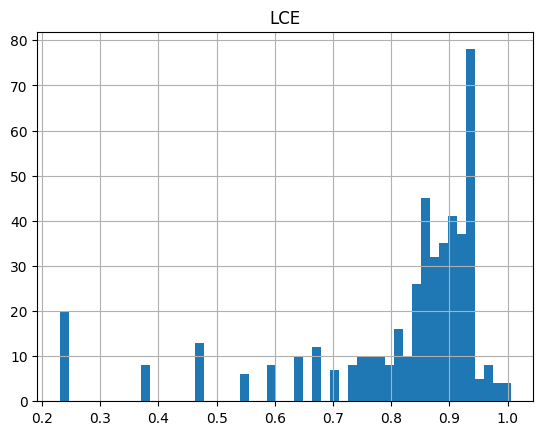

In [11]:
df.hist("LCE", bins=50)